# Project: Milestone 5

## Merging the Data and Storing in a Database/Visualizing Data

***Instructions)***

Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file. /p>

Clearly label each visualization. Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. In your write-up, make sure to address the ethical implications of cleansing data and your project topic. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

***Answer)***

### Load the individual cleaned and preped data sets

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
# Read the final cleaned version of the flat file and put it in a pandas df

finalDF_flat_file = pd.read_csv("C:/Users/ivan2/gitLocal/DSC540-WINTER2023/Project_Final_Version_data/flat_file_final_version.csv")

finalDF_flat_file.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2019,2020,2021,2022,2023,CBSA Code,CBSA Title
0,102001,0,United States,country,NaN,236620.500000,257496.416667,298450.500000,327870.666667,329633.6,NaN,NaN
1,394913,1,"New York, NY",msa,NY,393240.083333,425382.916667,490401.166667,528399.500000,542748.2,35620.0,"New York-Newark-Jersey City, NY-NJ"
2,753899,2,"Los Angeles, CA",msa,CA,632911.166667,681175.166667,791801.000000,864423.666667,853707.5,31080.0,"Los Angeles-Long Beach-Anaheim, CA"
3,394463,3,"Chicago, IL",msa,IL,231426.916667,246435.333333,269267.250000,281734.833333,290189.6,16980.0,"Chicago-Naperville-Elgin, IL-IN"
4,394514,4,"Dallas, TX",msa,TX,257652.666667,276523.250000,328398.583333,383366.333333,376548.3,19100.0,"Dallas-Fort Worth-Arlington, TX"


In [3]:
finalDF_flat_file.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
2019          float64
2020          float64
2021          float64
2022          float64
2023          float64
CBSA Code     float64
CBSA Title     object
dtype: object

In [4]:
# Read the final cleaned version of the web data and put it in a pandas df

finalDF_web_data = pd.read_csv("C:/Users/ivan2/gitLocal/DSC540-WINTER2023/Project_Final_Version_data/web_data_final_version.csv")

finalDF_web_data.head()

,Metropolitan Area,Per Capita Personal Income (PCPI) (2019),Rank in PCPI before adjustment,Purchasing power of $1.00 (2019),PCPI after adjustments for purchasing power of dollar,Rank in PCPI after adjustment,CBSA Code,CBSA Title
0,"New York City-Newark-Jersey City, NY-NJ-PA","$79,844",4.0,$0.80,"$63,875",7.0,35620.0,"New York-Newark-Jersey City, NY-NJ"
1,"Los Angeles-Long Beach-Anaheim, CA","$66,684",8.0,$0.84,"$56,015",34.0,31080.0,"Los Angeles-Long Beach-Anaheim, CA"
2,"Chicago-Naperville-Elgin, IL-IN-WI","$63,500",14.0,$0.97,"$61,595",18.0,16980.0,"Chicago-Naperville-Elgin, IL-IN"
3,"Dallas-Fort Worth-Arlington, TX","$58,725",22.0,$0.99,"$58,138",27.0,19100.0,"Dallas-Fort Worth-Arlington, TX"
4,"Houston-The Woodlands-Sugar Land, TX","$58,890",20.0,$0.98,"$57,712",28.0,26420.0,"Houston-Pasadena-The Woodlands, TX"


In [5]:
finalDF_web_data.dtypes

Metropolitan Area                                         object
Per Capita Personal Income (PCPI) (2019)                  object
Rank in PCPI before adjustment                           float64
Purchasing power of $1.00 (2019)                          object
PCPI after adjustments for purchasing power of dollar     object
Rank in PCPI after adjustment                            float64
CBSA Code                                                float64
CBSA Title                                                object
dtype: object

In [6]:
# Read the final cleaned version of the web data and put it in a pandas df

finalDF_api_data = pd.read_csv("C:/Users/ivan2/gitLocal/DSC540-WINTER2023/Project_Final_Version_data/api_data_final_version.csv")

finalDF_api_data.head()

,cbsa_msa_id,msa_name,prcnt_gross_yield_average,gross_yield_count,prcnt_gross_yield_median
0,35620,"New York-Newark-Jersey City, NY-NJ-PA",6.61,5047844,6.43
1,31080,"Los Angeles-Long Beach-Anaheim, CA",5.23,3005346,5.06
2,16980,"Chicago-Naperville-Elgin, IL-IN-WI",9.96,3121132,9.56
3,19100,"Dallas-Fort Worth-Arlington, TX",8.28,2273489,8.14
4,26420,"Houston-The Woodlands-Sugar Land, TX",9.04,2253476,8.93


In [7]:
finalDF_api_data.dtypes

cbsa_msa_id                    int64
msa_name                      object
prcnt_gross_yield_average    float64
gross_yield_count              int64
prcnt_gross_yield_median     float64
dtype: object

Now that the three datasets are here we can proceed to load them into a database.

### Load the three data sets into a Data Base

First I'll connect to SQLite Database.

In [8]:
import sqlite3

# Connect to an SQLite database and create the db file
conn = sqlite3.connect('final_clean_database.db')


Then I will write the data frames to the database.

In [9]:
# write the DataFrames to SQL tables
# although setting exists='replace' isn't required for our purposos, it doesn't hurt to keep this setting
finalDF_flat_file.to_sql('flat_file_table', conn, if_exists='replace', index=False)
finalDF_web_data.to_sql('web_data_table', conn, if_exists='replace', index=False)
finalDF_api_data.to_sql('api_data_table', conn, if_exists='replace', index=False)


5

Lastly, I will join these tables directly in SQL and load the results into a pandas DF.

In [10]:
cursor = conn.cursor()

# join query
join_query = """
SELECT *
FROM flat_file_table AS fft
LEFT JOIN web_data_table AS fwd ON fft."CBSA Code" = fwd."CBSA Code"
LEFT JOIN api_data_table AS fad ON fft."CBSA Code" = CAST(fad."CBSA_msa_id" AS FLOAT)
"""

# loading the joined table into a pandas data frame
joined_df = pd.read_sql_query(join_query, conn)

joined_df.shape


(686, 25)

In [11]:
joined_df.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2019,2020,2021,2022,2023,...,Purchasing power of $1.00 (2019),PCPI after adjustments for purchasing power of dollar,Rank in PCPI after adjustment,CBSA Code,CBSA Title,cbsa_msa_id,msa_name,prcnt_gross_yield_average,gross_yield_count,prcnt_gross_yield_median
0,102001,0,United States,country,None,236620.500000,257496.416667,298450.500000,327870.666667,329633.60,...,None,None,NaN,NaN,None,NaN,None,NaN,NaN,NaN
1,394913,1,"New York, NY",msa,NY,393240.083333,425382.916667,490401.166667,528399.500000,542748.20,...,$0.80,"$63,875",7.0,35620.0,"New York-Newark-Jersey City, NY-NJ",35620.0,"New York-Newark-Jersey City, NY-NJ-PA",6.61,5047844.0,6.43
2,753899,2,"Los Angeles, CA",msa,CA,632911.166667,681175.166667,791801.000000,864423.666667,853707.50,...,$0.84,"$56,015",34.0,31080.0,"Los Angeles-Long Beach-Anaheim, CA",31080.0,"Los Angeles-Long Beach-Anaheim, CA",5.23,3005346.0,5.06
3,394463,3,"Chicago, IL",msa,IL,231426.916667,246435.333333,269267.250000,281734.833333,290189.60,...,$0.97,"$61,595",18.0,16980.0,"Chicago-Naperville-Elgin, IL-IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",9.96,3121132.0,9.56
4,394514,4,"Dallas, TX",msa,TX,257652.666667,276523.250000,328398.583333,383366.333333,376548.30,...,$0.99,"$58,138",27.0,19100.0,"Dallas-Fort Worth-Arlington, TX",19100.0,"Dallas-Fort Worth-Arlington, TX",8.28,2273489.0,8.14
5,394692,5,"Houston, TX",msa,TX,227045.666667,242783.750000,285029.833333,318019.250000,314270.75,...,$0.98,"$57,712",28.0,26420.0,"Houston-Pasadena-The Woodlands, TX",26420.0,"Houston-The Woodlands-Sugar Land, TX",9.04,2253476.0,8.93
6,395209,6,"Washington, DC",msa,VA,391208.083333,420724.083333,452197.000000,479201.416667,493512.40,...,None,None,NaN,NaN,None,NaN,None,NaN,NaN,NaN
7,394974,7,"Philadelphia, PA",msa,PA,222815.833333,246531.416667,273311.583333,291129.750000,305068.80,...,$0.95,"$63,226",10.0,37980.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",NaN,None,NaN,NaN,NaN
8,394856,8,"Miami, FL",msa,FL,269488.250000,297198.500000,338096.583333,390854.583333,424966.40,...,$0.90,"$54,869",39.0,33100.0,"Miami-Fort Lauderdale-West Palm Beach, FL",NaN,None,NaN,NaN,NaN
9,394347,9,"Atlanta, GA",msa,GA,224811.083333,248773.916667,296850.750000,343001.166667,351229.70,...,$1.02,"$55,648",36.0,12060.0,"Atlanta-Sandy Springs-Roswell, GA",NaN,None,NaN,NaN,NaN


In [12]:
joined_df.dtypes

RegionID                                                   int64
SizeRank                                                   int64
RegionName                                                object
RegionType                                                object
StateName                                                 object
2019                                                     float64
2020                                                     float64
2021                                                     float64
2022                                                     float64
2023                                                     float64
CBSA Code                                                float64
CBSA Title                                                object
Metropolitan Area                                         object
Per Capita Personal Income (PCPI) (2019)                  object
Rank in PCPI before adjustment                           float64
Purchasing power of $1.00

In [13]:
conn.close()

### Visualizations

**Relationship between Median Sale Price and Purchasing Power of $1.00** 

In [21]:
# droping NaN
joined_dfV2 = joined_df.dropna(subset=['Purchasing power of $1.00 (2019)'])

In [22]:
# Drop records where '2019' value is higher than 600000 (outliers)
joined_dfV2 = joined_dfV2[joined_dfV2['2019'] <= 600000]

In [23]:
# Remove the dollar sign from 'Purchasing power of $1.00 (2019)' column
joined_dfV2['Purchasing power of $1.00 (2019)'] = joined_dfV2['Purchasing power of $1.00 (2019)'].str.replace('$', '')

# Convert the column to float
joined_dfV2['Purchasing power of $1.00 (2019)'] = joined_dfV2['Purchasing power of $1.00 (2019)'].astype(float)

C:\Users\ivan2\AppData\Local\Temp\ipykernel_26716\2830661669.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  joined_dfV2['Purchasing power of $1.00 (2019)'] = joined_dfV2['Purchasing power of $1.00 (2019)'].str.replace('$', '')


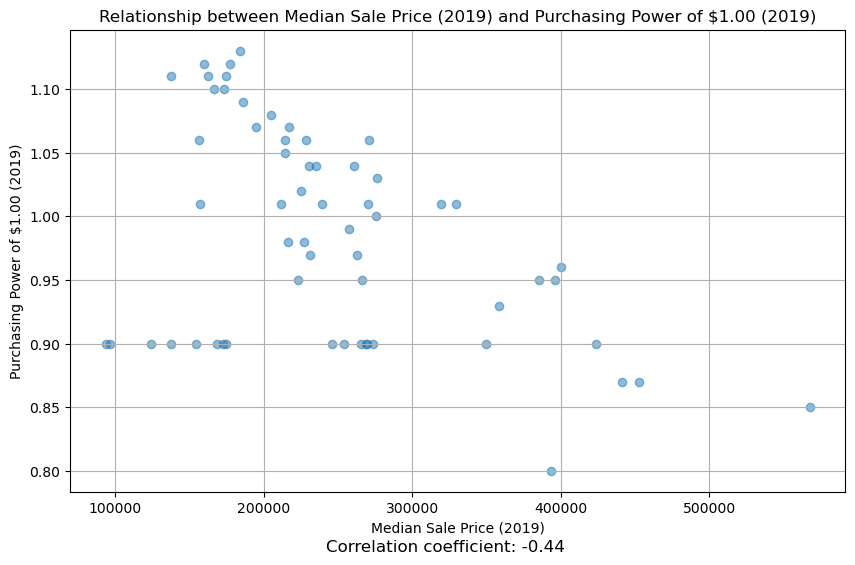

In [24]:
# Plot of median sale price and purchasing power of 1$

import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.scatter(joined_dfV2['2019'], joined_dfV2['Purchasing power of $1.00 (2019)'], alpha=0.5)  # alpha for point transparency

# Adding title and labels
plt.title('Relationship between Median Sale Price (2019) and Purchasing Power of $1.00 (2019)')
plt.xlabel('Median Sale Price (2019)')
plt.ylabel('Purchasing Power of $1.00 (2019)')

# Calculate and display the correlation
correlation = joined_dfV2['2019'].corr(joined_dfV2['Purchasing power of $1.00 (2019)'])
plt.figtext(0.5, 0.01, f'Correlation coefficient: {correlation:.2f}', ha='center', fontsize=12)

# Show the plot
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

The correlation coefficient of -0.44 suggests there is a moderate negative relationship between the median sale price and the purchasing power of 1.00 dollar. As the median sale price increases, there tends to be a decrease in the purchasing power of 1.00 dollar. However, this correlation is not very strong.

The data points appear to be more densely clustered at the lower end of the median sale price range. As the median sale price increases, the purchasing power data points become more spread out, indicating more variability in purchasing power at higher sale price levels.

This visualization can be useful for stakeholders looking to understand the economic dynamics of different regions. The negative correlation might imply that areas with higher cost of living (indicated by higher median sale prices) could be associated with a lower purchasing power of the dollar.

**Median Sale Price 5-Year Trend**

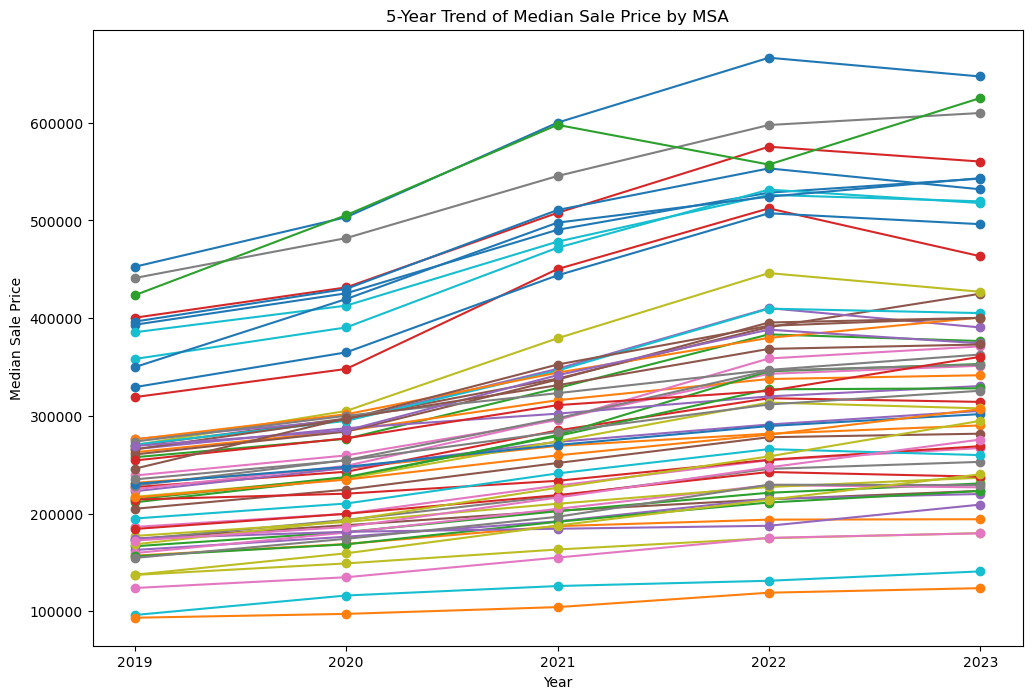

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the trend line for each MSA
years = np.array([2019, 2020, 2021, 2022, 2023])
plt.figure(figsize=(12, 8))

for index, row in joined_dfV2.iterrows():
    sale_prices = row[['2019', '2020', '2021', '2022', '2023']].values
    msa_label = row['CBSA Title']  # Get the MSA title for the legend
    plt.plot(years, sale_prices, marker='o', label=msa_label)  # Plot the data points

plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.title('5-Year Trend of Median Sale Price by MSA')
#plt.legend(loc='best')
plt.show()

This shows us that in general, most MSAs are seeing increases in median sale price YoY. This appears to be in line with expectations with inflation rising each year as well.

**Comparison of Purchasing Power vs. Percent Average of Gross Rental Income Yield** 

In [28]:
# droping NaN
joined_dfV3 = joined_df.dropna(subset=['prcnt_gross_yield_average'])

In [33]:
# Remove the dollar sign from 'Purchasing power of $1.00 (2019)' column
joined_dfV3['Purchasing power of $1.00 (2019)'] = joined_dfV3['Purchasing power of $1.00 (2019)'].str.replace('$', '')

# Convert the column to float
joined_dfV3['Purchasing power of $1.00 (2019)'] = joined_dfV3['Purchasing power of $1.00 (2019)'].astype(float)

C:\Users\ivan2\AppData\Local\Temp\ipykernel_26716\4060251586.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  joined_dfV3['Purchasing power of $1.00 (2019)'] = joined_dfV3['Purchasing power of $1.00 (2019)'].str.replace('$', '')
C:\Users\ivan2\AppData\Local\Temp\ipykernel_26716\4060251586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_dfV3['Purchasing power of $1.00 (2019)'] = joined_dfV3['Purchasing power of $1.00 (2019)'].str.replace('$', '')
C:\Users\ivan2\AppData\Local\Temp\ipykernel_26716\4060251586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

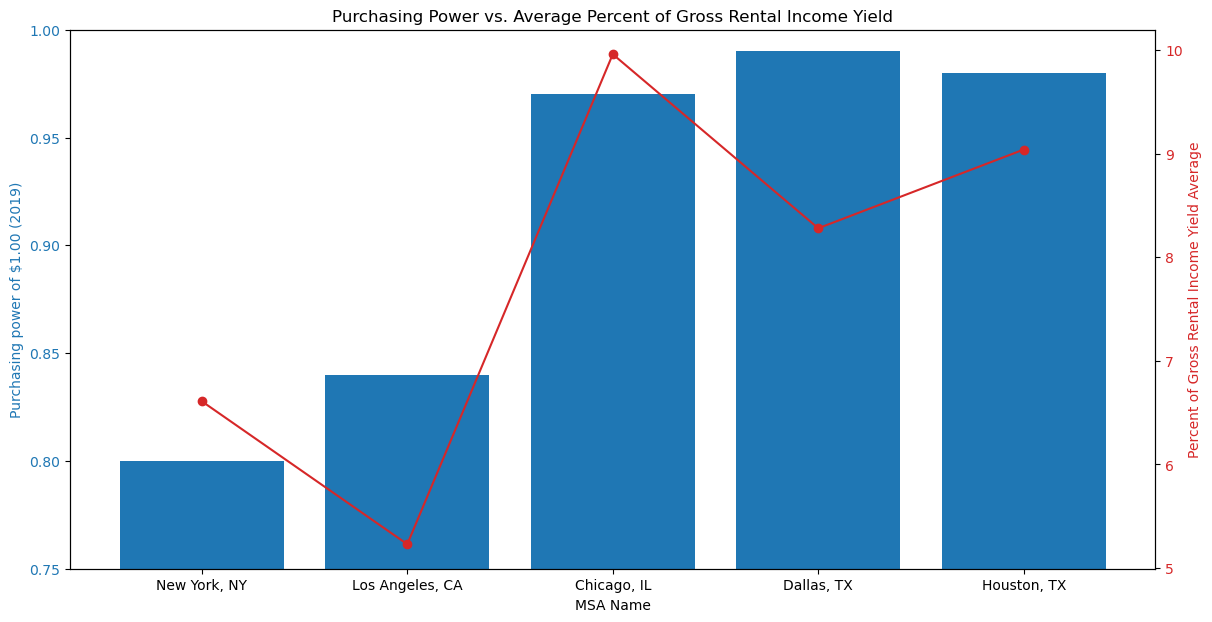

In [43]:
# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the 'Purchasing power of $1.00 (2019)' on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('MSA Name')
ax1.set_ylabel('Purchasing power of $1.00 (2019)', color=color)
ax1.bar(joined_dfV3['RegionName'], joined_dfV3['Purchasing power of $1.00 (2019)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=0)  # Rotate x-axis labels if needed
ax1.set_ylim(0.75, 1.00)  # Set the limits for the primary y-axis

# Create the secondary y-axis
ax2 = ax1.twinx()

# Plot the 'prcnt_gross_yield_average' on the secondary y-axis
color = 'tab:red'
ax2.set_ylabel('Percent of Gross Rental Income Yield Average', color=color)
ax2.plot(joined_dfV3['RegionName'], joined_dfV3['prcnt_gross_yield_average'], color=color, marker='o', linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)

# Adjust the layout to account for the rotated x-axis labels
#fig.tight_layout()

# Show the plot
plt.title('Purchasing Power vs. Average Percent of Gross Rental Income Yield')
plt.show()

This graph shows how purchasing power and rental income yield differs between MSAs. Based on the observed MSAs, an increased purchasing power tends to lead to higher rental income yields. 

Using contextual assumptions, one can infer that MSAs with higher cost of living will have higher priced homes, which will in turn make it more difficult for an invester to make a decent return on their investment. A rental investor in an MSA with lower purchasing power will have to charge more for rent to recoup their investment, all while in an economic market that makes it difficult for individuals to pay higher rents.

**Median Sale Price by MSAs** 

In [55]:
# droping NaN
joined_dfV4 = joined_df.dropna(subset=['Purchasing power of $1.00 (2019)'])

# List of RegionName values to drop
regions_to_drop = ['North Vernon, IN', 'Malone, NY', 'Point Pleasant, WV']

# Dropping specific RegionName records
joined_dfV4 = joined_dfV4[~joined_dfV4['RegionName'].isin(regions_to_drop)]

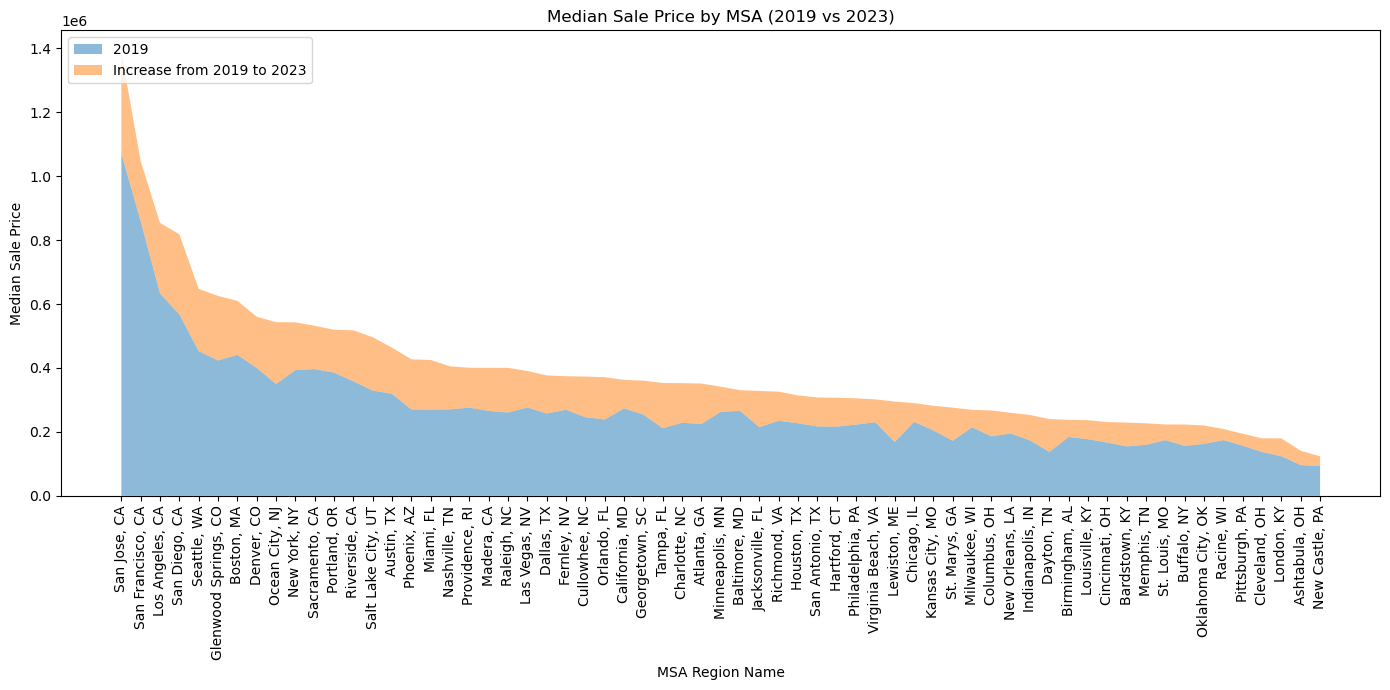

In [57]:
df_sorted = joined_dfV4.sort_values('2023', ascending=False)

plt.figure(figsize=(14, 7))

# Create the area graph
# Using stackplot for an area graph, where the '2019' is at the bottom and '2023' is on top
plt.stackplot(df_sorted['RegionName'], df_sorted['2019'], df_sorted['2023'] - df_sorted['2019'], 
              labels=['2019', 'Increase from 2019 to 2023'], alpha=0.5)

plt.xlabel('MSA Region Name')  # Set the x-axis label
plt.ylabel('Median Sale Price in Millions')  # Set the y-axis label
plt.title('Median Sale Price by MSA (2019 vs 2023)')  # Set the title of the graph
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.legend(loc='upper left')  # Add a legend to distinguish between the two years

plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot

This graph allows us to visualize the increse in median sale price over 2019 to 2023 across MSAs. There is a higher jump in median sale price increase consistencly across the top 25 MSAs than in the bottom 25, where the gap is consistently smaller.

**Adjusted Per Capital Personal Income vs. Median Sale Price** 

In [70]:
# droping NaN
joined_dfV5 = joined_df.dropna(subset=['PCPI after adjustments for purchasing power of dollar'])

# List of RegionName values to drop
regions_to_drop = ['North Vernon, IN', 'Malone, NY', 'Point Pleasant, WV']

# Dropping specific RegionName records
joined_dfV5 = joined_dfV5[~joined_dfV5['RegionName'].isin(regions_to_drop)]

In [71]:
# Remove the dollar sign and , from 'PCPI after adjustments for purchasing power of dollar' column

joined_dfV5['PCPI after adjustments for purchasing power of dollar'] = (
    joined_dfV5['PCPI after adjustments for purchasing power of dollar']
    .str.replace('$', '', regex=True)
    .str.replace(',', '', regex=True)
    .str.replace(' ', '')
    .astype(float)
)

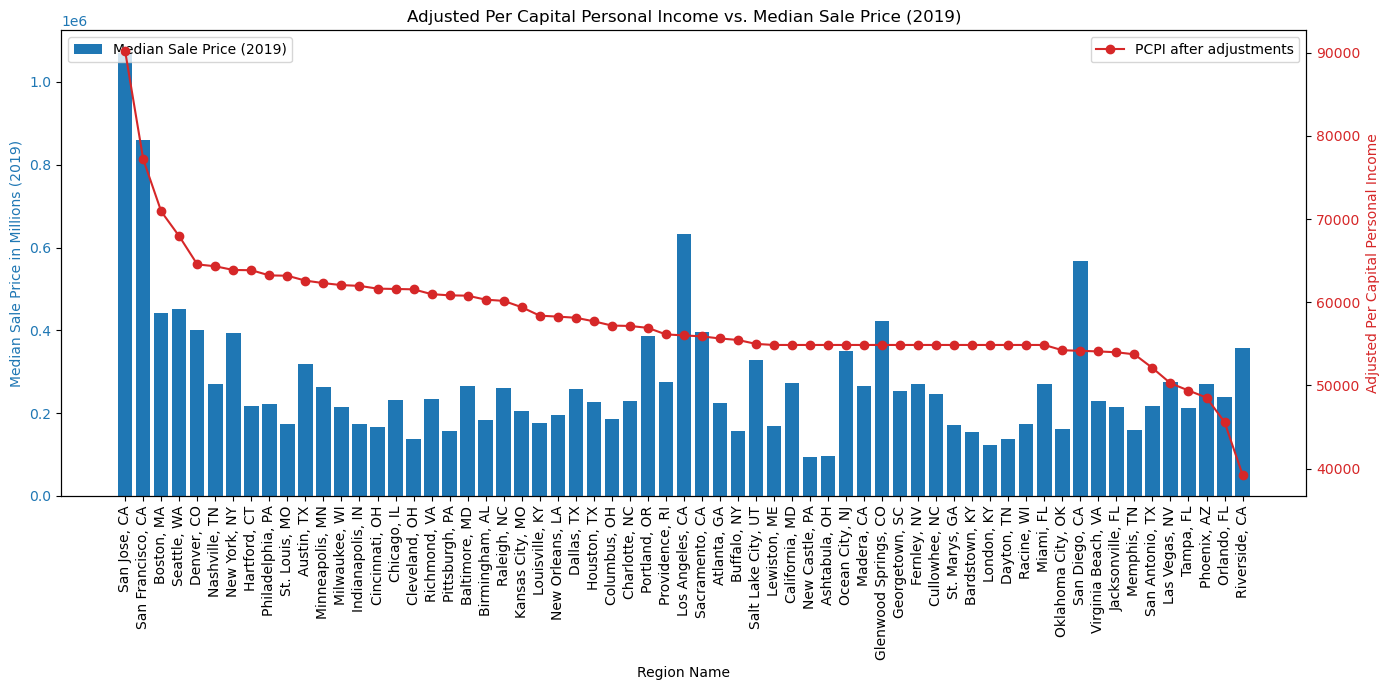

In [76]:
#sorted df
joined_dfV5_sorted = joined_dfV5.sort_values('PCPI after adjustments for purchasing power of dollar', ascending=False)

# Create the figure and first axis for the Median Sale Price
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the '2019' median sale price as a bar graph on the left axis using the sorted data
ax1.bar(joined_dfV5_sorted['RegionName'], joined_dfV5_sorted['2019'], color='tab:blue', label='Median Sale Price (2019)')
ax1.set_xlabel('Region Name')
ax1.set_ylabel('Median Sale Price in Millions (2019)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.tick_params(axis='x', rotation=90)

# Create the secondary y-axis for the adjusted per capita personal income using the sorted data
ax2 = ax1.twinx()
ax2.plot(joined_dfV5_sorted['RegionName'], joined_dfV5_sorted['PCPI after adjustments for purchasing power of dollar'], color='tab:red', marker='o', linestyle='-', label='PCPI after adjustments')
ax2.set_ylabel('Adjusted Per Capital Personal Income', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust the layout and show the plot
plt.title('Adjusted Per Capital Personal Income vs. Median Sale Price (2019)')
fig.tight_layout()
plt.show()

This visualizes the Per Capital Personal Income of individuals within an MSA against the Home Median Sale Price. This graph is useful to highlight the MSAs where personal income can be considered low when compared to the cost of living (with regards to home prices).

Anywhere where the red dot of Adjusted PCPI is within the blue bar of Median Sale Price can be considered places of high cost of living. This includes many MSAs in California but also some less known MSAs like Glenwood Springs, CO and Orlando, FL.

Inversly, MSAs with large gaps between Median Sale Price and Adjusted PCPI can be considered markets with stable economies and favorable individual purchasing power.